In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import EPPE_Simulator as eppe
import astropy.constants as const
from astropy.io import fits
import time

In [2]:
expTime = 2*np.pi
intTime = np.pi*10*24.

stellarVariability = True
randomOrientation = False
albedo = 0.3#'theo'
polEff = 1.
filt = 'V'

highPassSize = 20

In [3]:
systems = eppe.Systems(load=True, polEff=polEff, randomOrientation=randomOrientation, albedo=albedo)

# mission = eppe.EPPE(systems, rad=0.8, filt=filt) # POMM
mission = eppe.EPPE(systems, filt=filt) # EPPE

In [4]:
tic = time.time()
stokesCurves = mission.observe_polarization(expTime, intTime, stellarVariability=stellarVariability)
stokesCurves_ideal = mission.observe_polarization(expTime, intTime, photonNoise=False, pStart=0)
_, fstars, _, _ = mission.observe_photometric(expTime, intTime, photonNoise=True, pStart=0)
toc = time.time()
print('Took', toc-tic, 's')

Took 9.278303861618042 s


In [5]:
# i = 1
# i = systems.name_to_index('WASP-12 b')
# i = systems.name_to_index('HD 189733 b')
# i = systems.name_to_index('HD 209458 b')
# i = systems.name_to_index('KELT-7 b')
i = systems.name_to_index('KELT-9 b')
# i = systems.name_to_index('tau Boo b')
# i = systems.name_to_index('ups And b')

systems.index_details(i)

Name: KELT-9 b
Radius: 1.89 Rjup
Period: 1.48 days
Equilibrium Temperature: 4049 K
Transit Depth: 0.678%
Distance: 189 pc


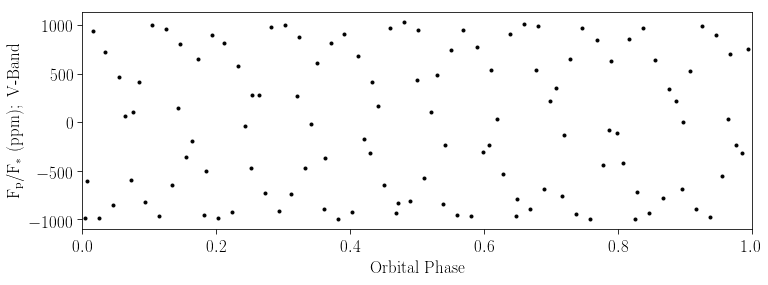

In [6]:
eppe.plot_lightcurve(stokesCurves[i], filt, fstars[i])#, stokesCurve_ideal=stokesCurves_ideal[i], lines=True)

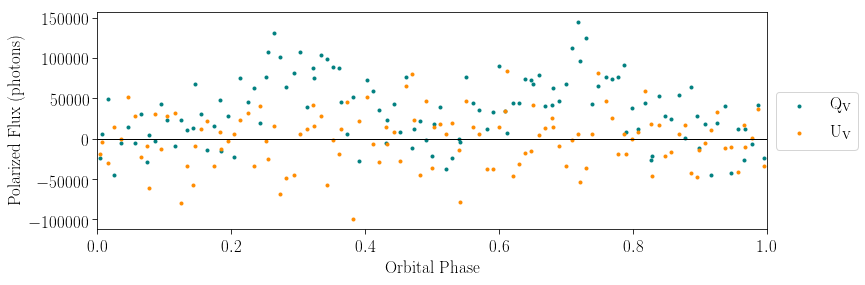

In [7]:
eppe.plot_QU(stokesCurves[i], filt)#, stokesCurve_ideal=stokesCurves_ideal[i], lines=True)

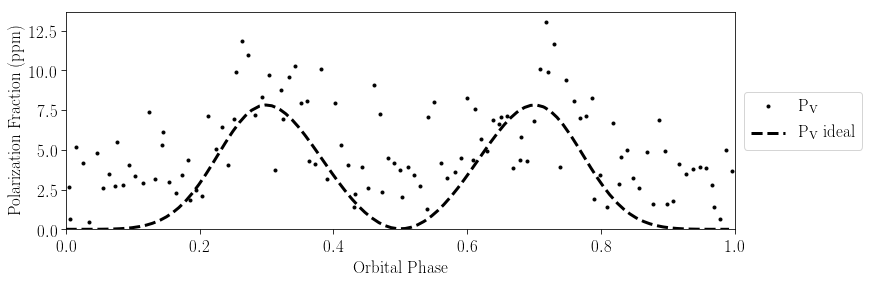

In [8]:
eppe.plot_P(stokesCurves[i], filt, stokesCurve_ideal=stokesCurves_ideal[i], lines=True)